###### 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [2]:
os.getcwd()

'C:\\Users\\OWNER\\dt sense\\Tugas akhir\\codes'

In [3]:
os.chdir('C:\\Users\\OWNER\\dt sense\\Tugas akhir\\Data\\input')

###### 2. Load Data

In [4]:
data=pd.read_csv('regression_data.csv')
data.head()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_prob
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


###### 3. EDA 

In [5]:
data.describe()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_prob
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gre_score                500 non-null    int64  
 1   toefl_score              500 non-null    int64  
 2   univ_ranking             500 non-null    int64  
 3   motiv_letter_strength    500 non-null    float64
 4   recommendation_strength  500 non-null    float64
 5   gpa                      500 non-null    float64
 6   research_exp             500 non-null    int64  
 7   admit_prob               500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [7]:
data.isnull().sum()

gre_score                  0
toefl_score                0
univ_ranking               0
motiv_letter_strength      0
recommendation_strength    0
gpa                        0
research_exp               0
admit_prob                 0
dtype: int64

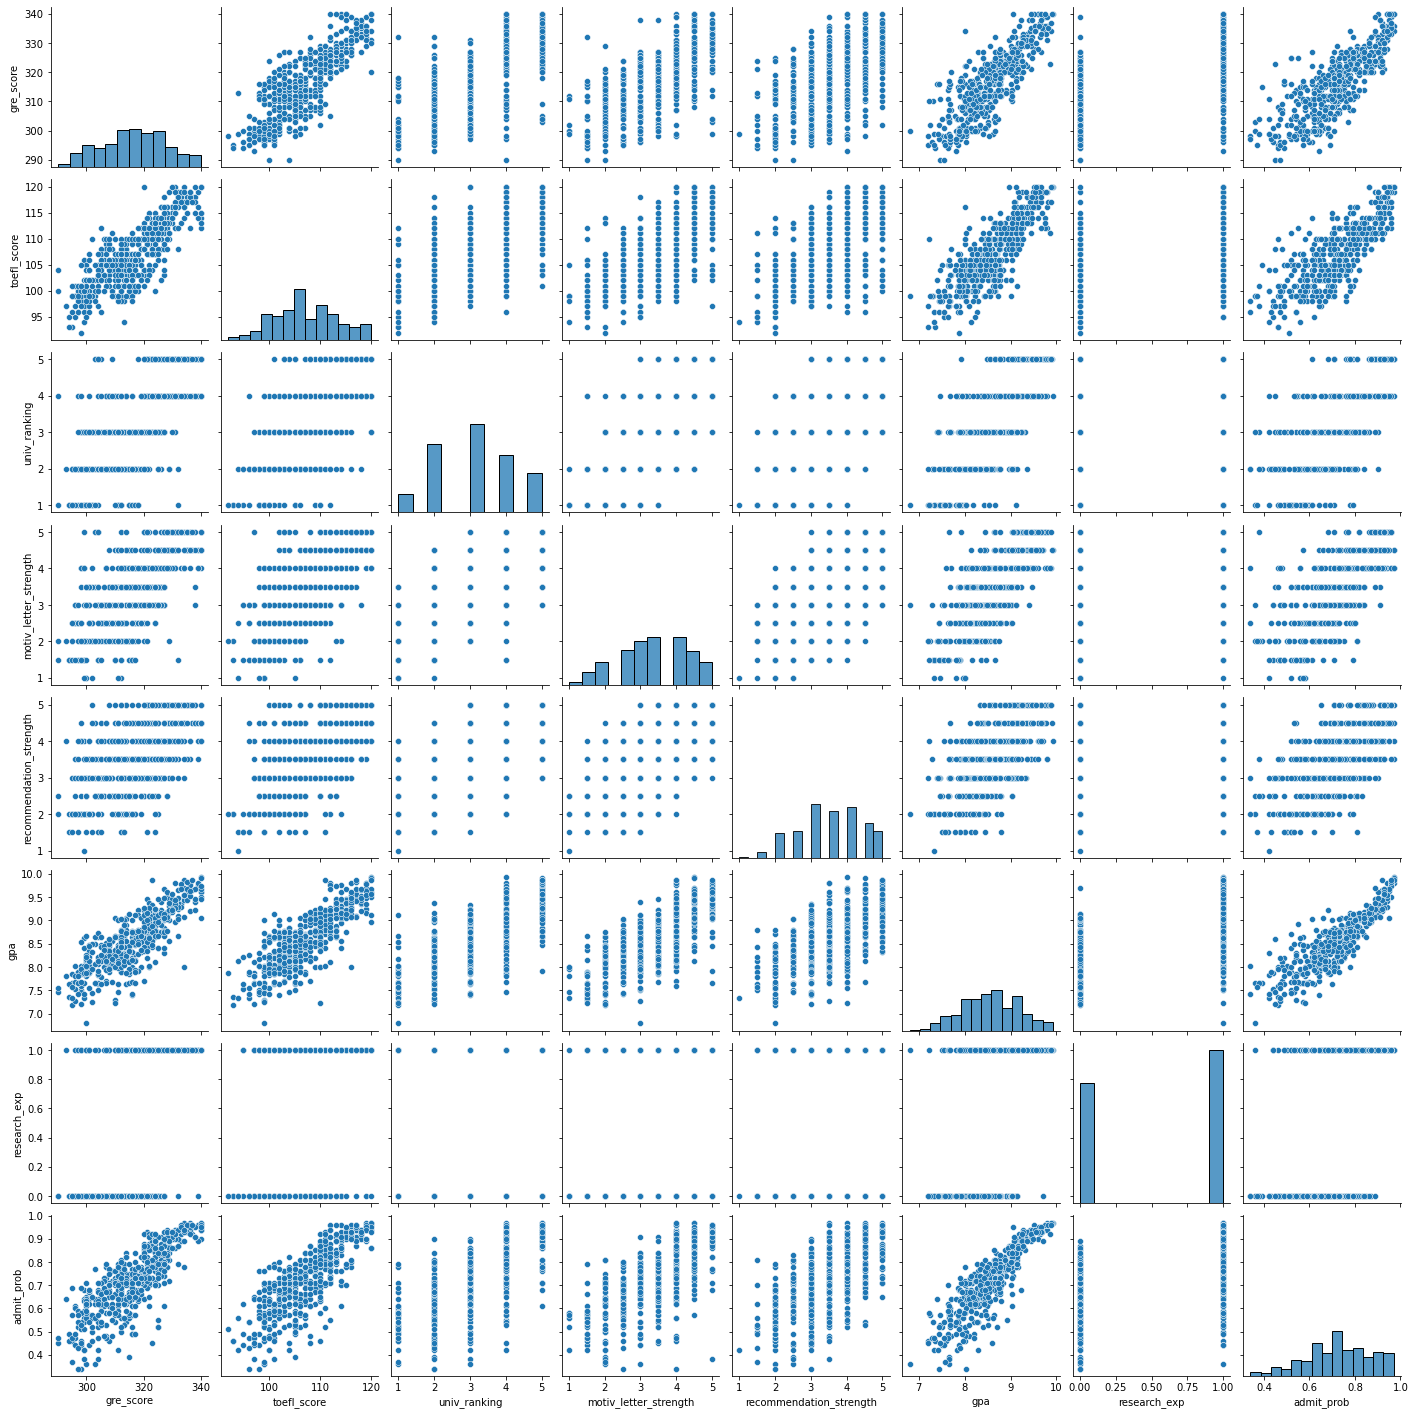

In [8]:
sns.pairplot(data)

<AxesSubplot:>

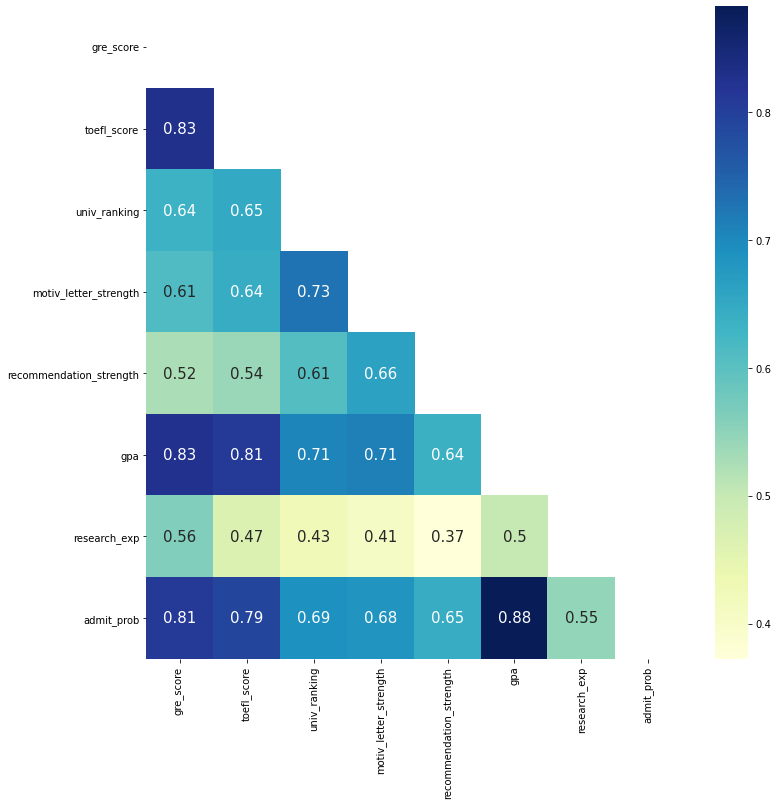

In [9]:
correlation_between_column = data.corr()
upper_triangle_corr = np.triu(correlation_between_column)

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(correlation_between_column, annot = True, cmap="YlGnBu",ax=ax,annot_kws={"size":15},mask=upper_triangle_corr)

###### 4.Memisahkan prediktor dan target dari data

In [10]:
target='admit_prob'
X=data.drop(target,axis=1)
y=data[target]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=123)


###### 5.Melakukan Feature Selection

In [12]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
selector=SelectKBest(f_regression,k=3)
selector.fit(X_train,y_train)
X_New=selector.transform(X_train)
X_New_test=selector.transform(X_test)

In [13]:
selector.get_support()

array([ True,  True, False, False, False,  True, False])

###### 6.Melakukan regresi dengan linear regression

In [14]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()
clf.fit(X_New,y_train)

LinearRegression()

In [15]:
y_pred=clf.predict(X_New_test)
y_pred

array([0.8141119 , 0.92187724, 0.54449394, 0.64272174, 0.82016602,
       0.68690549, 0.88875588, 0.77517724, 0.62915251, 0.88237379,
       0.89419195, 0.77978438, 0.94376723, 0.60915664, 0.68044553,
       0.82113269, 0.52846651, 0.73305589, 0.92622956, 0.65174106,
       0.55065586, 0.74319554, 0.82689674, 0.71700782, 0.84576563,
       0.64469962, 0.58225104, 0.65859551, 0.97095155, 0.87006262,
       0.5425746 , 0.72626795, 0.68498615, 0.6452671 , 0.49203134,
       0.8335403 , 0.84264677, 0.76485531, 0.94849145, 0.61554671,
       0.64943049, 0.7459292 , 0.65808055, 0.90263112, 0.78078762,
       0.69791536, 0.67028994, 0.68189722, 0.98097411, 0.82801575,
       0.77541674, 0.55503943, 0.62348491, 0.68219526, 0.56115209,
       0.57290507, 0.70576641, 0.5256743 , 0.59927978, 0.69148401,
       0.86236524, 0.83477508, 0.77719773, 0.55286659, 0.64437165,
       0.88954824, 0.86522131, 0.82143073, 0.82806633, 0.8942505 ,
       0.61627255, 0.7734974 , 0.6403746 , 0.83788597, 0.57208

In [16]:
clf.score(X_New_test,y_test)

0.7479667142874947

In [17]:
clf.coef_ 

array([0.00279088, 0.00332178, 0.13518652])

###### 7.Melakukan regresi dengan SVM. Gunakan kernel liniear

In [54]:
from sklearn.svm import SVR
clf2=SVR(kernel="linear")
clf2.fit(X_New,y_train)

SVR(kernel='linear')

In [55]:
y_pred2=clf2.predict(X_New_test)
y_pred2

array([0.80144544, 0.91556472, 0.53948831, 0.63064467, 0.80430188,
       0.67614588, 0.87797506, 0.77046782, 0.61802846, 0.86583339,
       0.87745527, 0.7676388 , 0.91847844, 0.58931234, 0.68474103,
       0.80694521, 0.51458507, 0.70223868, 0.90204935, 0.6353712 ,
       0.53214339, 0.71926024, 0.81571066, 0.68735358, 0.84336778,
       0.63988958, 0.5688896 , 0.64589621, 0.9635639 , 0.86584631,
       0.53541952, 0.70154858, 0.67207709, 0.64274848, 0.47585821,
       0.82730267, 0.83184598, 0.74915391, 0.92600166, 0.60611281,
       0.63617678, 0.73221548, 0.65165435, 0.89399984, 0.76958158,
       0.67544039, 0.65840187, 0.67109076, 0.97023323, 0.81211088,
       0.76404148, 0.54505829, 0.62963339, 0.66984053, 0.55309085,
       0.57077263, 0.6991442 , 0.49645371, 0.58763591, 0.6786762 ,
       0.85179419, 0.81816031, 0.77557126, 0.54619797, 0.63060433,
       0.88098484, 0.84797085, 0.80569499, 0.8126282 , 0.88263139,
       0.59928767, 0.75997269, 0.63215079, 0.82502332, 0.55722

In [56]:
clf2.score(X_New_test,y_test)

0.7355657739657571

In [22]:
clf2.coef_

array([[0.00223655, 0.005796  , 0.12098878]])

###### 8.Melakukan regresi dengan MLP, dengan aktivasi tanh dan 2 hidden layer sebanyak 100 dan 100

In [23]:
from sklearn.neural_network import MLPRegressor

In [41]:
clf3=MLPRegressor(hidden_layer_sizes=(100,100),activation="tanh",max_iter=1000)
clf3.fit(X_New,y_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=(100, 100), max_iter=1000)

In [42]:
y_pred3=clf3.predict(X_New_test)
y_pred3

array([0.76326404, 0.8231154 , 0.74270899, 0.6724968 , 0.75414533,
       0.78024214, 0.79832302, 0.79367786, 0.71589093, 0.74763139,
       0.77686184, 0.73302424, 0.75395765, 0.60039948, 0.8166293 ,
       0.7438784 , 0.63132182, 0.60780903, 0.78875633, 0.64237492,
       0.62854806, 0.65031333, 0.78101384, 0.59505875, 0.81677563,
       0.75666946, 0.68820128, 0.70312436, 0.82504241, 0.79830593,
       0.67958828, 0.63674813, 0.71889373, 0.80325332, 0.63211025,
       0.80638305, 0.78032877, 0.70801324, 0.72610929, 0.72076708,
       0.71931279, 0.70504963, 0.80065951, 0.82270336, 0.76083118,
       0.67018793, 0.70201376, 0.70802901, 0.82623194, 0.77566779,
       0.79352645, 0.69843318, 0.79335174, 0.72567797, 0.71073548,
       0.73057013, 0.77322805, 0.56238629, 0.61954679, 0.74165154,
       0.78621283, 0.7768309 , 0.77073489, 0.72351399, 0.68932618,
       0.80019816, 0.79095584, 0.76127138, 0.7307425 , 0.79394103,
       0.63553026, 0.7352878 , 0.71140024, 0.77052099, 0.67488

In [43]:
clf3.score(X_New_test,y_test)

0.3209290986241077

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

###### 9. Melakukan evaluasi metric dengan menghitung MSE dari ketiga model regresi 

In [28]:
mean_squared_error(y_test,y_pred)

0.004943832005546505

In [29]:
mean_squared_error(y_test,y_pred2)

0.005187086246700243

In [30]:
mean_squared_error(y_test,y_pred3)

0.013533459873766309

###### 10. Melakukan evaluasi metric dengan menghitung MAE dari ketiga model regresi 

In [31]:
mean_absolute_error(y_test,y_pred)

0.046710979914408715

In [32]:
mean_absolute_error(y_test,y_pred2)

0.05117197924260187

In [33]:
mean_absolute_error(y_test,y_pred3)

0.09889783073229401

###### 11.Melakukan evaluasi metric dengan menghitung koefisien determinasi (R^2) dari ketiga model 

In [34]:
r2_score(y_test,y_pred)

0.7479667142874947

In [35]:
r2_score(y_test,y_pred2)

0.7355657739657571

In [36]:
r2_score(y_test,y_pred3)

0.3100731668841118

###### 12. Kesimpulan

Dari ketiga model diatas model yang paling baik performanya yaitu model pertama (Linier Regression) 
hal ini dapat dilihat dari MAE (0.0467) dan MSE(0.00494) yang paling rendah dan R^2 paling tinggi (0.7479)
